# Team 4 Python Machine Learning CA Project Codes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from datetime import datetime 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn import neural_network
import sys
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

Using TensorFlow backend.


# Import Data

In [2]:
da = pd.read_csv('Tempreturedata1(original)forLinearRegression.csv')
da1 = pd.read_csv('Tempreturedata1(normalized)forLinearRegression.csv')


In [3]:
X=da[['mean_sunshine_hrs','mean_realtive humidity','total_rainfall','no_of_rainy_days','max_temperature']]
Y=da['temp_category']
X1=da1[['mean_sunshine_hrs','mean_realtive humidity','total_rainfall','no_of_rainy_days','max_temperature']]
Y1=da1['temp_category']
Y2=da1['surface_air mean_temp']
Y3=da['surface_air mean_temp']

# Data spliting

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
#Data splitting by random splitting method
x_train, x_test, y_train, y_test = train_test_split(X,Y, random_state = 25)
x1_train, x1_test, y1_train, y1_test = train_test_split(X1,Y1, random_state = 25)

In [6]:
#Date splitting manually
x2_train=X.iloc[0:400,:]
x2_test=X.iloc[401:453, :]
y2_train=Y.iloc[0:400]
y2_test=Y.iloc[401:453]

In [7]:
#Date splitting manually
x4_train=X1.iloc[0:400,:]
x4_test=X1.iloc[401:453, :]
y4_train=Y1.iloc[0:400]
y4_test=Y1.iloc[401:453]

Y_train=Y2.iloc[0:400]
Y_test=Y2.iloc[401:453]

# Linear Regression Model (Normalized)

In [8]:
x3_train, x3_test, y3_train, y3_test = train_test_split(X1,Y2, random_state = 15)#split the Normalized data

In [9]:
from sklearn.linear_model import LinearRegression
a=datetime.now() 
#instantiate
linReg = LinearRegression()

In [10]:
# fit out linear model to the train set data
linReg_model = linReg.fit(x3_train, y3_train)
b=datetime.now() 
duration=b-a
print ("Training time:",duration)

Training time: 0:00:00.017954


In [11]:
print(linReg.intercept_)
print(linReg.coef_)

27.659490790613486
[ 0.1207296  -0.30950534 -0.12979502  0.18689082  0.36716467]


In [12]:
y_hat = linReg.predict(x3_test) #Prediction

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y3_test, y_hat) #Get the mean squared error

0.22018438452151526

In [14]:
r2_score(y3_test, y_hat) #Get the prediction accuracy

0.6680302395016117

# Linear Regression Model (without Normalization)

In [15]:
x5_train, x5_test, y5_train, y5_test = train_test_split(X,Y3, random_state = 15)##split the original data

In [16]:
a=datetime.now() 
#instantiate
linReg2 = LinearRegression()
linReg_model = linReg2.fit(x5_train, y5_train)
b=datetime.now() 
duration=b-a
print ("Training time:",duration)
y5_hat = linReg2.predict(x5_test) #Prediction

Training time: 0:00:00.000996


In [17]:
mean_squared_error(y5_test, y5_hat)

0.22018438455686692

In [18]:
r2_score(y5_test, y5_hat)#Get the prediction accuracy

0.6680302394483123


# Random Forest Model (without Normalization)

In [19]:
a=datetime.now() 
from sklearn.ensemble import RandomForestClassifier
#Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
#Fit on training data (original dataset)
model.fit(x_train, y_train)
b=datetime.now() 
duration=b-a
print ("Training time:",duration)

Training time: 0:00:00.177526


In [20]:
rf_predictions = model.predict(x_test)#Prediction based on Random splitting data method

In [21]:
model.fit(x2_train, y2_train)#Fit on training data (original dataset)
rf2_predictions = model.predict(x2_test)#Prediction based on Manual splitting data method

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, rf_predictions)#random forest accuracy(Random splitting data)

0.9035087719298246

In [23]:
accuracy_score(y2_test, rf2_predictions)#random forest accuracy(Manual splitting data)

0.8846153846153846

# Random Forest (Normalized)

In [24]:
model.fit(x1_train, y1_train)
rf3_predictions = model.predict(x1_test)#Prediction based on Random splitting data method

In [25]:
model.fit(x4_train, y4_train)
rf4_predictions = model.predict(x4_test)#Prediction based on Manual splitting data method

In [26]:
accuracy_score(y1_test, rf3_predictions)#random forest accuracy(Random splitting data)

0.8859649122807017

In [27]:
accuracy_score(y4_test, rf4_predictions)#random forest accuracy(Manual splitting data)

0.8846153846153846

# Decision Tree model (without Normalization)

In [28]:
#import decision tree model from sklearn
from sklearn.tree import DecisionTreeClassifier
a=datetime.now()
dt = DecisionTreeClassifier() 
dt.fit(x_train, y_train) #train our model (original dataset)
b=datetime.now() 
duration=b-a
print ("Training time:",duration)

Training time: 0:00:00.001996


In [29]:
y_dt_pred = dt.predict(x_test)#Prediction based on Random splitting data method

In [30]:
a=datetime.now()
dt.fit(x2_train, y2_train)#train our model (original dataset)
b=datetime.now() 
duration=b-a
print ("Training time:",duration)

Training time: 0:00:00.001995


In [31]:
y2_dt_pred = dt.predict(x2_test) #Prediction based on Manual splitting data method

In [32]:
from sklearn.metrics import accuracy_score#single decision tree accuracy(Random spliting data)
accuracy_score(y_test, y_dt_pred)

0.9210526315789473

In [33]:
accuracy_score(y2_test, y2_dt_pred)#single decision tree accuracy(Manual spliting data)

0.8846153846153846

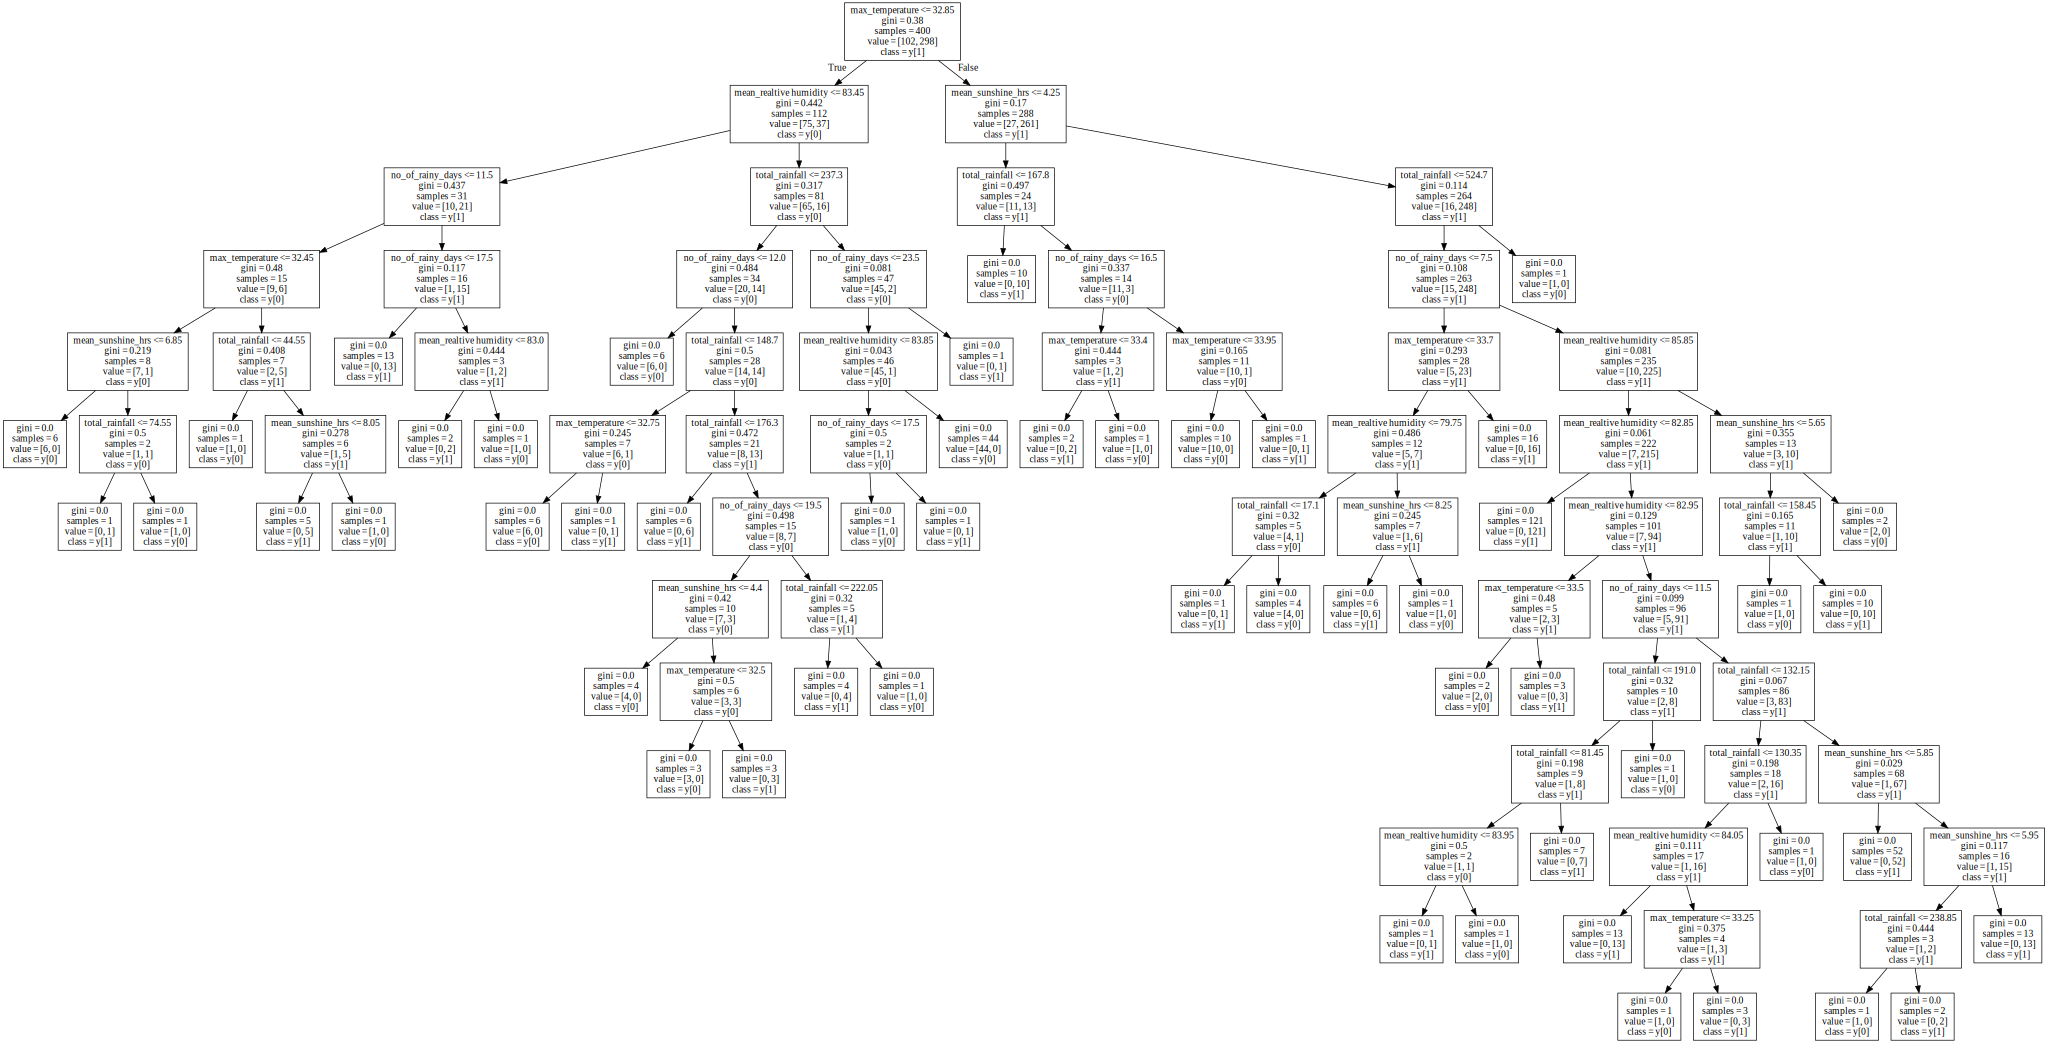

In [34]:
#show the decision tree model
#import graphviz and sklearn.tree first
import os

os.environ["PATH"] += os.pathsep + 'C:/Python/Graphviz2.38/bin/'

from sklearn import tree
import graphviz
from graphviz import Source

Source(tree.export_graphviz(dt, out_file=None, class_names=True, feature_names= x_train.columns)) #display the tree, with no output file

# Decision Tree (Normalized)

In [35]:
dt.fit(x1_train, y1_train) #train our model 
y3_dt_pred = dt.predict(x1_test)#Prediction based on Random splitting data method

In [36]:
accuracy_score(y1_test, y3_dt_pred)#single decision tree accuracy(Random splitting data)

0.9035087719298246

In [37]:
dt.fit(x4_train, y4_train) #train our model
y4_dt_pred = dt.predict(x4_test)#Prediction based on Manual splitting data method

In [38]:
accuracy_score(y4_test, y4_dt_pred)#single decision tree accuracy(Manual splitting data)

0.8653846153846154

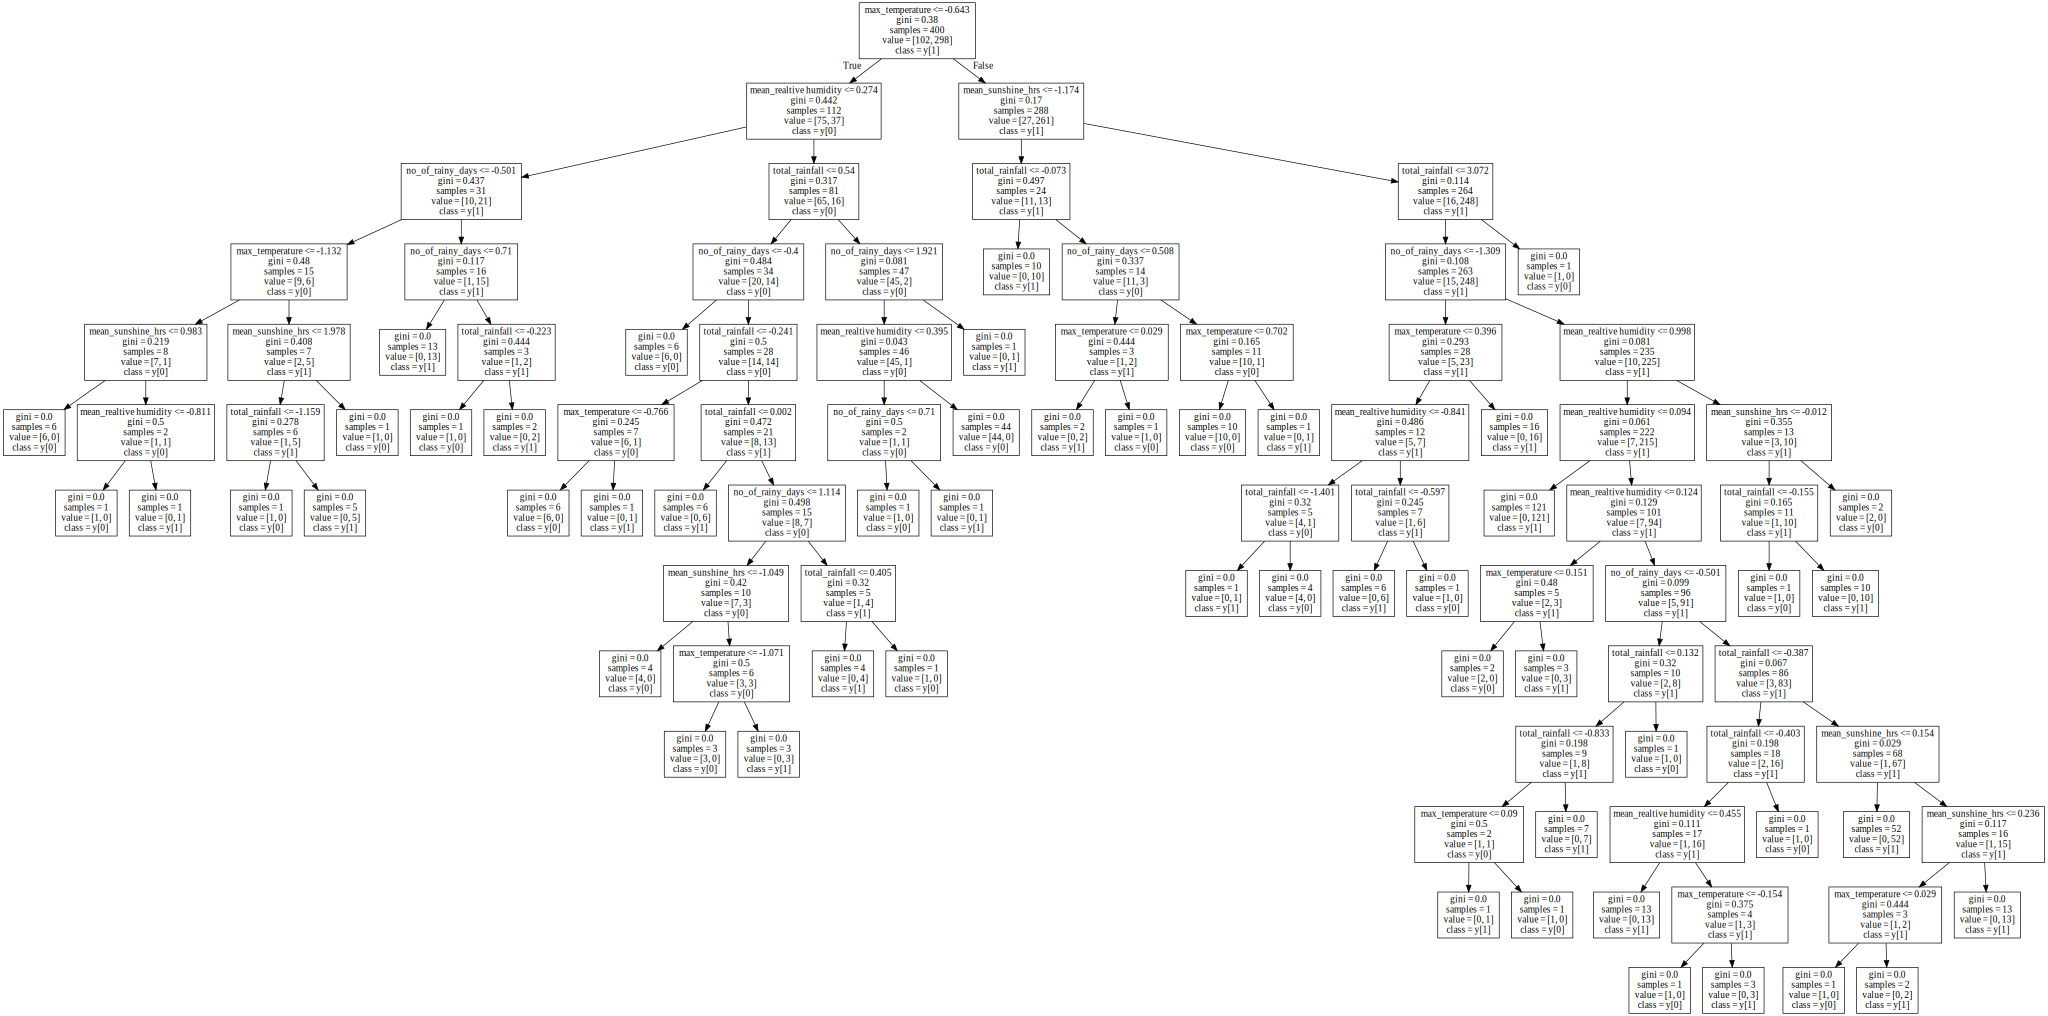

In [39]:
# show the decision tree model
# import graphviz and sklearn.tree first
import os

os.environ["PATH"] += os.pathsep + 'C:/Python/Graphviz2.38/bin/'

from sklearn import tree
import graphviz
from graphviz import Source

Source(tree.export_graphviz(dt, out_file=None, class_names=True, feature_names= x_train.columns)) #display the tree, with no output file

# KNN Model (without Normalization)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
a=datetime.now() 

# we choose k = 3 here, due to the small number of data we have
# there isn't a k suitable for all. Generally we want to choose a small odd number.
# large k is generally more costy
knn_model = KNeighborsClassifier(n_neighbors = 3) 
knn_model.fit(x_train, y_train) # train our model (original dataset)
b=datetime.now() 
duration=b-a
print ("Training time:",duration)

Training time: 0:00:00.001995


In [41]:
y_KNN_pred = knn_model.predict(x_test)#Prediction based on Random splitting data method

In [42]:
accuracy_score(y_test, y_KNN_pred)#KNN accuracy (Random splitting data)

0.8245614035087719

In [43]:
knn_model.fit(x2_train, y2_train) #train our model (original dataset)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [44]:
y2_KNN_pred = knn_model.predict(x2_test)#Prediction based on Manual splitting data method

In [45]:
accuracy_score(y2_test, y2_KNN_pred)#KNN accuracy (Manual splitting data)

0.9615384615384616

# KNN Model (Normalized)

In [46]:
knn_model = KNeighborsClassifier(n_neighbors = 3) 
knn_model.fit(x4_train, y4_train) #train our model (manual splitting dataset)
y3_KNN_pred = knn_model.predict(x4_test)#Prediction based on Manual splitting data method

In [47]:
accuracy_score(y4_test, y3_KNN_pred)##KNN accuracy (Manual splitting data)

0.8846153846153846

In [48]:
knn_model = KNeighborsClassifier(n_neighbors = 3) 
knn_model.fit(x1_train, y1_train) # train our model (Random splitting dataset)
y4_KNN_pred = knn_model.predict(x1_test)

In [49]:
accuracy_score(y1_test, y4_KNN_pred)#KNN accuracy (Random splitting data)

0.8947368421052632

# Logistic Regression Model (without Normalization)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
a=datetime.now() 
logReg = LogisticRegression(solver = 'lbfgs')

In [51]:
logReg.fit(x_train, y_train)#train model (orignal dataset)
b=datetime.now() 
duration=b-a
print ("Training time:",duration)

Training time: 0:00:00.019948


In [52]:
from sklearn.metrics import accuracy_score

y_LOG_pred = logReg.predict(x_test)


In [53]:
accuracy_score(y_test, y_LOG_pred)#LogisticRegression accuracy (Random splitting data)

0.9385964912280702

In [54]:
logReg.fit(x2_train, y2_train)#train model (orignal dataset)
y2_LOG_pred = logReg.predict(x2_test)

In [55]:
accuracy_score(y2_test, y2_LOG_pred)#LogisticRegression accuracy (Manual splitting data)

0.9230769230769231

# Logistic Regression Model (Normalized)

In [56]:
logReg.fit(x1_train, y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
y1_LOG_pred = logReg.predict(x1_test)

In [58]:
accuracy_score(y1_test, y1_LOG_pred)#LogisticRegression accuracy (Random spliting data)

0.9298245614035088

In [59]:
logReg.fit(x4_train, y4_train)#train model 
y4_LOG_pred = logReg.predict(x4_test)

In [60]:
accuracy_score(y4_test, y4_LOG_pred)#LogisticRegression accuracy (Manual splitting data)

0.9230769230769231

# Principal Component Analysis(PCA)

In [61]:
from sklearn.decomposition import PCA
a=datetime.now() 

pca = PCA(n_components=2)## choose 2 components
principalComponents = pca.fit_transform(X1)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

b=datetime.now() 
duration=b-a
print ("Training time:",duration)

Training time: 0:00:00.001995


In [62]:
# To see all the components, specify n_components as default
pca.components_
pca_all = PCA()
pca_all.fit(X1)#PCA should base on normalized dataset
W = pca_all.components_ 
W

array([[-4.63171229e-01,  4.70711756e-01,  4.73879502e-01,
         4.80041200e-01, -3.30002303e-01],
       [-1.52626392e-01, -2.57990169e-02,  1.51816098e-01,
         3.53670823e-01,  9.09894728e-01],
       [ 7.86742868e-01,  2.83897424e-01,  5.44909847e-01,
        -1.85031261e-02,  5.62921482e-02],
       [-3.52865326e-04, -8.34582595e-01,  4.62816812e-01,
         2.30232963e-01, -1.90434108e-01],
       [-3.78435111e-01,  2.52784088e-02,  4.91186266e-01,
        -7.68848368e-01,  1.54130166e-01]])

In [63]:
finalDf = pd.concat([principalDf, Y], axis = 1)
finalDf

,principal component 1,principal component 2,temp_category
0,-0.243503,-1.999979,0
1,-3.037101,-0.033317,1
2,-0.542390,0.867711,1
3,0.840933,-0.124157,0
4,-0.460350,-0.935032,1
...,...,...,...
448,-2.063213,1.116250,1
449,0.046657,-0.207522,1
450,-3.020345,-0.795013,1
451,-3.936349,-0.259464,1


In [64]:
principalDf

,principal component 1,principal component 2
0,-0.243503,-1.999979
1,-3.037101,-0.033317
2,-0.542390,0.867711
3,0.840933,-0.124157
4,-0.460350,-0.935032
...,...,...
448,-2.063213,1.116250
449,0.046657,-0.207522
450,-3.020345,-0.795013
451,-3.936349,-0.259464


In [65]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())#showing the explained variance 

[0.63740091 0.15268911]
0.7900900197916095


In [66]:
pca1=PCA(n_components=3)
principalComponents = pca1.fit_transform(X1)

In [67]:
print(pca1.explained_variance_ratio_)

print(pca1.explained_variance_ratio_.sum())#showing the explained variance under 3 components generated

[0.63740091 0.15268911 0.08469561]
0.8747856250630155


In [68]:
principalDf3 = pd.DataFrame(data = principalComponents
, columns = ['principal component 1', 'principal component 2','principal component 3'])

In [69]:
principalDf3

,principal component 1,principal component 2,principal component 3
0,-0.243503,-1.999979,-0.574774
1,-3.037101,-0.033317,0.387877
2,-0.542390,0.867711,-0.387606
3,0.840933,-0.124157,-0.445586
4,-0.460350,-0.935032,-0.227752
...,...,...,...
448,-2.063213,1.116250,0.166129
449,0.046657,-0.207522,-0.542526
450,-3.020345,-0.795013,-0.193548
451,-3.936349,-0.259464,-0.346840


In [70]:
pca2=PCA(n_components=4)
principalComponents = pca2.fit_transform(X1)

In [71]:
print(pca2.explained_variance_ratio_)

print(pca2.explained_variance_ratio_.sum())#showing the explained variance under 4 components generated

[0.63740091 0.15268911 0.08469561 0.07438462]
0.9491702466921159


In [72]:
principalDf4 = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])

# Density-based spatial clustering of applications with noise(DBSCAN)

In [73]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
a=datetime.now() 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)##Based on normalized dataset

# cluster the data
dbscan = DBSCAN(eps=0.333, min_samples = 3)
clusters = dbscan.fit_predict(X_scaled)
b=datetime.now() 
duration=b-a
print ("Training time:",duration)

Training time: 0:00:00.003989


In [74]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print(f'Number of clusters = {n_clusters_}')
print(f'Number of noise sample = {n_noise_}')

Number of clusters = 2
Number of noise sample = 447


In [75]:
print('It is found that too much noise sample')

It is found that too much noise sample


In [76]:
# cluster the data
dbscan = DBSCAN(eps=0.9, min_samples = 3)#increase eps to 0.9
clusters = dbscan.fit_predict(X_scaled)
b=datetime.now() 
duration=b-a
print ("Training time:",duration)

Training time: 0:00:00.032913


In [77]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print(f'Number of clusters = {n_clusters_}')
print(f'Number of noise sample = {n_noise_}')

Number of clusters = 2
Number of noise sample = 56


# Using PCA outcome to do the DBSCAN

In [78]:
a=datetime.now() 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(principalDf)##Based on normalized dataset

# cluster the data
dbscan = DBSCAN(eps=0.333, min_samples = 3)
clusters = dbscan.fit_predict(X_scaled)
b=datetime.now() 
duration=b-a
print ("Training time:",duration)

Training time: 0:00:00.005984


In [79]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print(f'Number of clusters = {n_clusters_}')
print(f'Number of noise sample = {n_noise_}')

Number of clusters = 3
Number of noise sample = 20


In [80]:
# cluster the data
dbscan = DBSCAN(eps=0.4, min_samples = 3)# change the eps to get a new outcome
clusters = dbscan.fit_predict(X_scaled)


In [81]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print(f'Number of clusters = {n_clusters_}')
print(f'Number of noise sample = {n_noise_}')

Number of clusters = 2
Number of noise sample = 16


# K-Means Clustering

In [82]:
from sklearn import datasets
from sklearn.cluster import KMeans
a=datetime.now() 
km2 = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km2.fit(X1)#Based on normalized dataset
y_kmeans = km2.fit_predict(X1)
b=datetime.now() 
duration=b-a
print ("Training time:",duration)

Training time: 0:00:00.047871


In [83]:
X[y_kmeans==0]

,mean_sunshine_hrs,mean_realtive humidity,total_rainfall,no_of_rainy_days,max_temperature
0,5.6,81.2,107.1,10,31.9
1,7.6,79.5,27.8,5,34.3
2,5.1,82.3,160.8,11,34.3
4,5.8,83.2,102.2,10,32.9
5,7.3,80.3,59.5,8,33.3
...,...,...,...,...,...
448,7.0,79.2,69.0,13,34.7
449,5.3,79.5,173.8,16,33.0
450,7.5,75.2,12.2,8,33.4
451,7.6,72.1,11.8,6,34.0


In [84]:
x=X1.iloc[:,:].values
x

array([[-0.05383091, -0.40399877, -0.60747018, -0.8039787 , -1.80465952],
       [ 1.60503999, -0.91663586, -1.30623098, -1.81340872,  1.12943025],
       [-0.46854863, -0.07229241, -0.13428663, -0.60209269,  1.12943025],
       ...,
       [ 1.52209644, -2.21330616, -1.44369212, -1.20775071,  0.02914659],
       [ 1.60503999, -3.14811498, -1.44721677, -1.61152271,  0.76266903],
       [ 0.85854808, -2.87671887, -1.35028904, -2.01529472,  1.12943025]])

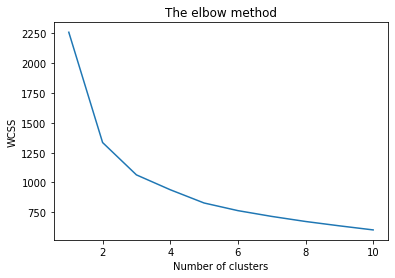

In [85]:
from sklearn import datasets
from sklearn.cluster import KMeans

wcss = []
# Trying kmeans for k=1 to k=10
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 30, random_state = 0)
    kmeans.fit(x)#Based on normalized dataset
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()## The diagram shows that setting 2 or 3 clusters will be the best

In [86]:
#Finding the optimum number of clusters for k-means classification
km2 = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)# Setting 2 clusters


km2.fit(x)
y_kmeans = km2.fit_predict(x)

In [87]:
y_kmeans

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,

In [88]:
km3 = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)# Setting 3 clusters

km3.fit(principalDf)
y3_kmeans = km3.fit_predict(principalDf)
y3_kmeans

array([0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 0,
       0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 0,
       2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2,
       2, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 2, 2, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 2, 1, 1, 0, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 1, 1, 1, 0, 0, 0, 2, 0, 1, 2, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 2, 0, 0, 1, 1, 1, 0, 2,
       2, 0, 0, 0, 0, 2, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,

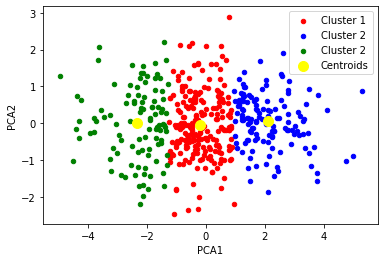

In [89]:
#Visualising the clusters by selecting only column 3 and 4
plt.scatter(principalDf.iloc[y3_kmeans == 0, 0], principalDf.iloc[y3_kmeans == 0, 1], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(principalDf.iloc[y3_kmeans == 1, 0], principalDf.iloc[y3_kmeans == 1, 1], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(principalDf.iloc[y3_kmeans == 2, 0], principalDf.iloc[y3_kmeans == 2, 1], s = 20, c = 'green', label = 'Cluster 2')

#Plotting the centroids of the clusters
plt.scatter(km3.cluster_centers_[:, 0], km3.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.legend()
plt.show()

# Building Neural Network Model (for Regression) with sklearn.neural_network package

In [90]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(X1,Y2, random_state =200)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, random_state =200)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state =200)

In [91]:
from numpy.random import seed
seed(300)

In [92]:
#Model 1
mlp = neural_network.MLPRegressor(hidden_layer_sizes=(10), activation="logistic",
                 solver='lbfgs', 
                max_iter=10000)

a=mlp.fit(x1_train, y1_train)
y_pred = a.predict(x1_test)

In [93]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y1_test, y_pred) #Get the mean squared error

0.29165881384054826

In [94]:
r2_score(y1_test, y_pred)#Get the prediction accuracy

0.5539091877207547

In [95]:
#Model 2
mlp = neural_network.MLPRegressor(hidden_layer_sizes=(10), activation="relu",
                 solver='lbfgs', 
                max_iter=10000)

a=mlp.fit(x1_train, y1_train)
y2_pred = a.predict(x1_test)

In [96]:
r2_score(y1_test, y2_pred)#Get the prediction accuracy

0.6972568607208807

In [97]:
#Model 3
mlp = neural_network.MLPRegressor(hidden_layer_sizes=(20), activation="relu",
                 solver='lbfgs', 
                max_iter=10000)

a=mlp.fit(x1_train, y1_train)
y3_pred = a.predict(x1_test)

In [98]:
r2_score(y1_test, y3_pred)#Get the prediction accuracy

0.6781737285169734

In [99]:
#Model 4
mlp = neural_network.MLPRegressor(hidden_layer_sizes=(10), activation="relu",
                 solver='sgd', 
                max_iter=10000)

a=mlp.fit(x1_train, y1_train)
y4_pred = a.predict(x1_test)

In [100]:
r2_score(y1_test, y4_pred)#Get the prediction accuracy

0.6700555216939147

# Neural Network Model for classification 

In [101]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam',max_iter= 1000000,activation="relu",
                    hidden_layer_sizes=(100, 2), random_state=110)

In [102]:
clf.fit(X1_train, Y1_train) 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=110, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [103]:
y5_pred = clf.predict(X1_test)

In [104]:
mean_squared_error(Y1_test, y5_pred) #Get the mean squared error

0.10526315789473684

In [105]:
r2_score(Y1_test, y5_pred)#Get the prediction accuracy

0.5052441229656419

# Neural Network Model for classification with Keras package (without Normalization)

In [106]:
a=datetime.now() 
model = Sequential()

In [107]:
model.add(Dense(16, input_shape=(5,)))
model.add(Activation('relu'))

In [108]:
model.add(Dense(2))
model.add(Activation('softmax'))

In [109]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [110]:
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

train_y_ohe = one_hot_encode_object_array(Y_train)
test_y_ohe = one_hot_encode_object_array(Y_test)

In [111]:
model.fit(X_train, train_y_ohe, epochs=100, batch_size=1, verbose=1);
b=datetime.now() 
duration = b -a
print("duration", duration)

Epoch 1/100
339/339 [==============================] - 0s 780us/step - loss: 6.6712 - accuracy: 0.6018
Epoch 2/100
339/339 [==============================] - 0s 615us/step - loss: 1.3585 - accuracy: 0.6903
Epoch 3/100
339/339 [==============================] - 0s 612us/step - loss: 0.9273 - accuracy: 0.7286
Epoch 4/100
339/339 [==============================] - 0s 618us/step - loss: 0.7820 - accuracy: 0.7168
Epoch 5/100
339/339 [==============================] - 0s 621us/step - loss: 0.6861 - accuracy: 0.7522
Epoch 6/100
339/339 [==============================] - 0s 618us/step - loss: 0.6716 - accuracy: 0.7758
Epoch 7/100
339/339 [==============================] - 0s 612us/step - loss: 0.6489 - accuracy: 0.7817
Epoch 8/100
339/339 [==============================] - 0s 615us/step - loss: 0.7196 - accuracy: 0.7434
Epoch 9/100
339/339 [==============================] - 0s 621us/step - loss: 0.5922 - accuracy: 0.7699
Epoch 10/100
339/339 [==============================] - 0s 627us/step - l

In [112]:
loss, accuracy = model.evaluate(X_test, test_y_ohe, verbose=0)
print("Accuracy = {:.2f}".format(accuracy))

Accuracy = 0.75


# Neural Network Model for classification with Keras package (Normalized)

In [113]:
a=datetime.now() 
train_y1_ohe = one_hot_encode_object_array(Y1_train)
test_y1_ohe = one_hot_encode_object_array(Y1_test)

In [114]:
model.fit(X1_train, train_y1_ohe, epochs=100, batch_size=1, verbose=1);
b=datetime.now() 
duration = b-a
print("duration", duration)

Epoch 1/100
339/339 [==============================] - 0s 641us/step - loss: 0.4286 - accuracy: 0.8289
Epoch 2/100
339/339 [==============================] - 0s 621us/step - loss: 0.3557 - accuracy: 0.8732
Epoch 3/100
339/339 [==============================] - 0s 700us/step - loss: 0.3356 - accuracy: 0.8879
Epoch 4/100
339/339 [==============================] - 0s 630us/step - loss: 0.3227 - accuracy: 0.8938
Epoch 5/100
339/339 [==============================] - 0s 644us/step - loss: 0.3148 - accuracy: 0.8909
Epoch 6/100
339/339 [==============================] - 0s 638us/step - loss: 0.3088 - accuracy: 0.8938
Epoch 7/100
339/339 [==============================] - 0s 630us/step - loss: 0.3065 - accuracy: 0.8879
Epoch 8/100
339/339 [==============================] - 0s 633us/step - loss: 0.3006 - accuracy: 0.8968
Epoch 9/100
339/339 [==============================] - 0s 615us/step - loss: 0.2981 - accuracy: 0.8909
Epoch 10/100
339/339 [==============================] - 0s 612us/step - l

In [115]:
loss, accuracy = model.evaluate(X1_test, test_y1_ohe, verbose=0)
print("Accuracy = {:.2f}".format(accuracy))

Accuracy = 0.84
